- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩용
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print(data[0,0])
print(data[0,1:].reshape(28,28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [12]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [7]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

9.0

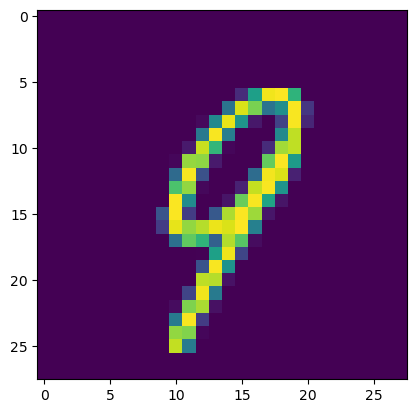

In [10]:
plt.imshow(data[22,1:].reshape(28,-1))
data[22,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. 데이터 생성 & 전처리

In [18]:
(X_train, y_train),(X_test, y_test)  = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [22]:
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

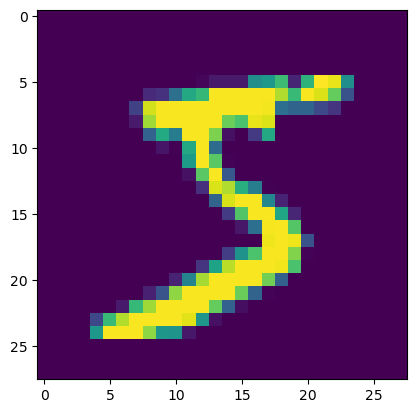

In [23]:
plt.imshow(X_train[0])
plt.show()

In [24]:
y_train[0]

5

In [25]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [26]:
# 훈련셋(학습시 사용), 검증셋(학습시 사용), 시험셋(평가시 사용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [27]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0 으로 나눠)
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [29]:
y_train = to_categorical(y_train).reshape(-1,10)
y_val = to_categorical(y_val).reshape(-1,10)
y_test = to_categorical(y_test).reshape(-1,10)
y_train.shape, y_val.shape, y_test.shape

((50000, 10), (10000, 10), (10000, 10))

In [34]:
# 훈련셋 (5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_indexs = np.random.choice(50000,700)
val_indexs = np.random.choice(10000,300)
X_train = X_train[train_indexs]
y_train = y_train[train_indexs]
X_val = X_val[val_indexs]
y_val = y_val[val_indexs]
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((700, 784), (300, 784), (700, 10), (300, 10))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


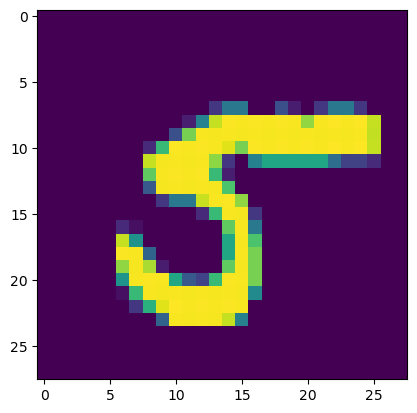

In [37]:
plt.imshow(X_train[5].reshape(-1, 28))
print(y_train[5])

## 2. 모델 구성하기
activation - https://keras.io/api/layers/activations/

In [38]:
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델학습과정 설정

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [42]:
hist = model.fit(X_train, y_train, batch_size=100, epochs=1200,
                validation_data=(X_val, y_val))

Epoch 1/1000
7/7 [==============================] - 0s 21ms/step - loss: 2.2695 - accuracy: 0.1357 - val_loss: 2.2520 - val_accuracy: 0.1133
Epoch 2/1000
7/7 [==============================] - 0s 16ms/step - loss: 2.2279 - accuracy: 0.1514 - val_loss: 2.2103 - val_accuracy: 0.1433
Epoch 3/1000
7/7 [==============================] - 0s 14ms/step - loss: 2.1882 - accuracy: 0.2043 - val_loss: 2.1785 - val_accuracy: 0.2033
Epoch 4/1000
7/7 [==============================] - 0s 13ms/step - loss: 2.1542 - accuracy: 0.2371 - val_loss: 2.1522 - val_accuracy: 0.2133
Epoch 5/1000
7/7 [==============================] - 0s 13ms/step - loss: 2.1258 - accuracy: 0.2443 - val_loss: 2.1283 - val_accuracy: 0.2467
Epoch 6/1000
7/7 [==============================] - 0s 14ms/step - loss: 2.0997 - accuracy: 0.2829 - val_loss: 2.1086 - val_accuracy: 0.2533
Epoch 7/1000
7/7 [==============================] - 0s 11ms/step - loss: 2.0775 - accuracy: 0.3129 - val_loss: 2.0904 - val_accuracy: 0.2900
Epoch 8/1000


Epoch 59/1000
7/7 [==============================] - 0s 11ms/step - loss: 1.5470 - accuracy: 0.4271 - val_loss: 1.6637 - val_accuracy: 0.4000
Epoch 60/1000
7/7 [==============================] - 0s 11ms/step - loss: 1.5421 - accuracy: 0.4314 - val_loss: 1.6602 - val_accuracy: 0.4000
Epoch 61/1000
7/7 [==============================] - 0s 11ms/step - loss: 1.5353 - accuracy: 0.4314 - val_loss: 1.6573 - val_accuracy: 0.4067
Epoch 62/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.5296 - accuracy: 0.4343 - val_loss: 1.6544 - val_accuracy: 0.4067
Epoch 63/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.5234 - accuracy: 0.4400 - val_loss: 1.6508 - val_accuracy: 0.4033
Epoch 64/1000
7/7 [==============================] - 0s 11ms/step - loss: 1.5179 - accuracy: 0.4429 - val_loss: 1.6474 - val_accuracy: 0.4033
Epoch 65/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.5119 - accuracy: 0.4429 - val_loss: 1.6436 - val_accuracy: 0.4067
Epoch 6

7/7 [==============================] - 0s 8ms/step - loss: 1.3040 - accuracy: 0.4929 - val_loss: 1.5651 - val_accuracy: 0.4367
Epoch 117/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.3006 - accuracy: 0.4986 - val_loss: 1.5642 - val_accuracy: 0.4400
Epoch 118/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.2977 - accuracy: 0.5014 - val_loss: 1.5642 - val_accuracy: 0.4367
Epoch 119/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.2949 - accuracy: 0.4986 - val_loss: 1.5642 - val_accuracy: 0.4367
Epoch 120/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.2917 - accuracy: 0.5029 - val_loss: 1.5637 - val_accuracy: 0.4367
Epoch 121/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.2891 - accuracy: 0.5014 - val_loss: 1.5621 - val_accuracy: 0.4400
Epoch 122/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.2864 - accuracy: 0.5029 - val_loss: 1.5618 - val_accuracy: 0.4400
Epoch 123/1000
7/7 [

Epoch 174/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.1669 - accuracy: 0.5414 - val_loss: 1.5665 - val_accuracy: 0.4700
Epoch 175/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.1653 - accuracy: 0.5414 - val_loss: 1.5679 - val_accuracy: 0.4667
Epoch 176/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.1630 - accuracy: 0.5429 - val_loss: 1.5665 - val_accuracy: 0.4733
Epoch 177/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.1611 - accuracy: 0.5471 - val_loss: 1.5687 - val_accuracy: 0.4733
Epoch 178/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.1597 - accuracy: 0.5429 - val_loss: 1.5680 - val_accuracy: 0.4800
Epoch 179/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.1574 - accuracy: 0.5471 - val_loss: 1.5707 - val_accuracy: 0.4733
Epoch 180/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.1558 - accuracy: 0.5443 - val_loss: 1.5688 - val_accuracy: 0.4800
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 1.0758 - accuracy: 0.5829 - val_loss: 1.6153 - val_accuracy: 0.4900
Epoch 232/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0750 - accuracy: 0.5814 - val_loss: 1.6181 - val_accuracy: 0.4900
Epoch 233/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0738 - accuracy: 0.5800 - val_loss: 1.6198 - val_accuracy: 0.4900
Epoch 234/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0724 - accuracy: 0.5771 - val_loss: 1.6207 - val_accuracy: 0.4867
Epoch 235/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0705 - accuracy: 0.5843 - val_loss: 1.6220 - val_accuracy: 0.4867
Epoch 236/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0693 - accuracy: 0.5857 - val_loss: 1.6219 - val_accuracy: 0.4900
Epoch 237/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.0678 - accuracy: 0.5857 - val_loss: 1.6245 - val_accuracy: 0.4900
Epoch 238/1000
7/7 [=

7/7 [==============================] - 0s 9ms/step - loss: 1.0069 - accuracy: 0.5943 - val_loss: 1.6960 - val_accuracy: 0.4667
Epoch 289/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.0054 - accuracy: 0.5971 - val_loss: 1.6992 - val_accuracy: 0.4633
Epoch 290/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0049 - accuracy: 0.5943 - val_loss: 1.7016 - val_accuracy: 0.4633
Epoch 291/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0036 - accuracy: 0.5971 - val_loss: 1.7029 - val_accuracy: 0.4633
Epoch 292/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0020 - accuracy: 0.5943 - val_loss: 1.7058 - val_accuracy: 0.4667
Epoch 293/1000
7/7 [==============================] - 0s 9ms/step - loss: 1.0015 - accuracy: 0.5986 - val_loss: 1.7085 - val_accuracy: 0.4633
Epoch 294/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.9999 - accuracy: 0.6000 - val_loss: 1.7088 - val_accuracy: 0.4633
Epoch 295/1000
7/7 [

7/7 [==============================] - 0s 10ms/step - loss: 0.9498 - accuracy: 0.6243 - val_loss: 1.7997 - val_accuracy: 0.4533
Epoch 346/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.9488 - accuracy: 0.6243 - val_loss: 1.8035 - val_accuracy: 0.4567
Epoch 347/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.9478 - accuracy: 0.6243 - val_loss: 1.8090 - val_accuracy: 0.4500
Epoch 348/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.9466 - accuracy: 0.6229 - val_loss: 1.8107 - val_accuracy: 0.4500
Epoch 349/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.9461 - accuracy: 0.6271 - val_loss: 1.8088 - val_accuracy: 0.4567
Epoch 350/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.9450 - accuracy: 0.6300 - val_loss: 1.8120 - val_accuracy: 0.4533
Epoch 351/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.9444 - accuracy: 0.6257 - val_loss: 1.8098 - val_accuracy: 0.4600
Epoch 352/1000
7

7/7 [==============================] - 0s 11ms/step - loss: 0.9039 - accuracy: 0.6429 - val_loss: 1.9176 - val_accuracy: 0.4533
Epoch 403/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.9031 - accuracy: 0.6429 - val_loss: 1.9187 - val_accuracy: 0.4533
Epoch 404/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.9023 - accuracy: 0.6486 - val_loss: 1.9218 - val_accuracy: 0.4533
Epoch 405/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.9015 - accuracy: 0.6429 - val_loss: 1.9239 - val_accuracy: 0.4533
Epoch 406/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.9007 - accuracy: 0.6429 - val_loss: 1.9227 - val_accuracy: 0.4533
Epoch 407/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.9003 - accuracy: 0.6429 - val_loss: 1.9240 - val_accuracy: 0.4533
Epoch 408/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8995 - accuracy: 0.6414 - val_loss: 1.9290 - val_accuracy: 0.4533
Epoch 409/1000
7

7/7 [==============================] - 0s 10ms/step - loss: 0.8637 - accuracy: 0.6729 - val_loss: 2.0362 - val_accuracy: 0.4567
Epoch 460/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8628 - accuracy: 0.6700 - val_loss: 2.0334 - val_accuracy: 0.4567
Epoch 461/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8624 - accuracy: 0.6700 - val_loss: 2.0326 - val_accuracy: 0.4567
Epoch 462/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8612 - accuracy: 0.6714 - val_loss: 2.0363 - val_accuracy: 0.4567
Epoch 463/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8614 - accuracy: 0.6700 - val_loss: 2.0304 - val_accuracy: 0.4567
Epoch 464/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8601 - accuracy: 0.6686 - val_loss: 2.0373 - val_accuracy: 0.4567
Epoch 465/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8593 - accuracy: 0.6700 - val_loss: 2.0449 - val_accuracy: 0.4600
Epoch 466/1000

7/7 [==============================] - 0s 9ms/step - loss: 0.8246 - accuracy: 0.6857 - val_loss: 2.1521 - val_accuracy: 0.4533
Epoch 517/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8239 - accuracy: 0.6886 - val_loss: 2.1578 - val_accuracy: 0.4500
Epoch 518/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8236 - accuracy: 0.6871 - val_loss: 2.1556 - val_accuracy: 0.4533
Epoch 519/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.8227 - accuracy: 0.6900 - val_loss: 2.1607 - val_accuracy: 0.4500
Epoch 520/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.8220 - accuracy: 0.6886 - val_loss: 2.1604 - val_accuracy: 0.4500
Epoch 521/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8213 - accuracy: 0.6914 - val_loss: 2.1605 - val_accuracy: 0.4567
Epoch 522/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8210 - accuracy: 0.6957 - val_loss: 2.1640 - val_accuracy: 0.4567
Epoch 523/1000
7/

7/7 [==============================] - 0s 10ms/step - loss: 0.7903 - accuracy: 0.7043 - val_loss: 2.2890 - val_accuracy: 0.4533
Epoch 574/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7898 - accuracy: 0.7043 - val_loss: 2.2857 - val_accuracy: 0.4500
Epoch 575/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7894 - accuracy: 0.7057 - val_loss: 2.2899 - val_accuracy: 0.4500
Epoch 576/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7889 - accuracy: 0.7029 - val_loss: 2.2911 - val_accuracy: 0.4533
Epoch 577/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7886 - accuracy: 0.7014 - val_loss: 2.2984 - val_accuracy: 0.4533
Epoch 578/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7880 - accuracy: 0.7029 - val_loss: 2.3002 - val_accuracy: 0.4533
Epoch 579/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7874 - accuracy: 0.7057 - val_loss: 2.3036 - val_accuracy: 0.4533
Epoch 580/1000
7

7/7 [==============================] - 0s 10ms/step - loss: 0.7646 - accuracy: 0.7186 - val_loss: 2.4208 - val_accuracy: 0.4467
Epoch 631/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7640 - accuracy: 0.7200 - val_loss: 2.4219 - val_accuracy: 0.4467
Epoch 632/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7637 - accuracy: 0.7143 - val_loss: 2.4204 - val_accuracy: 0.4500
Epoch 633/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7634 - accuracy: 0.7186 - val_loss: 2.4223 - val_accuracy: 0.4533
Epoch 634/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7631 - accuracy: 0.7186 - val_loss: 2.4209 - val_accuracy: 0.4500
Epoch 635/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7625 - accuracy: 0.7157 - val_loss: 2.4335 - val_accuracy: 0.4467
Epoch 636/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7620 - accuracy: 0.7157 - val_loss: 2.4392 - val_accuracy: 0.4433
Epoch 637/1000
7/7

7/7 [==============================] - 0s 11ms/step - loss: 0.7411 - accuracy: 0.7200 - val_loss: 2.5516 - val_accuracy: 0.4533
Epoch 688/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7411 - accuracy: 0.7214 - val_loss: 2.5626 - val_accuracy: 0.4500
Epoch 689/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7407 - accuracy: 0.7200 - val_loss: 2.5712 - val_accuracy: 0.4467
Epoch 690/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.7401 - accuracy: 0.7229 - val_loss: 2.5675 - val_accuracy: 0.4500
Epoch 691/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7396 - accuracy: 0.7257 - val_loss: 2.5765 - val_accuracy: 0.4567
Epoch 692/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.7391 - accuracy: 0.7229 - val_loss: 2.5763 - val_accuracy: 0.4500
Epoch 693/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7387 - accuracy: 0.7229 - val_loss: 2.5702 - val_accuracy: 0.4533
Epoch 694/1000
7

7/7 [==============================] - 0s 9ms/step - loss: 0.7207 - accuracy: 0.7300 - val_loss: 2.7020 - val_accuracy: 0.4467
Epoch 745/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7205 - accuracy: 0.7329 - val_loss: 2.7089 - val_accuracy: 0.4467
Epoch 746/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7203 - accuracy: 0.7300 - val_loss: 2.7001 - val_accuracy: 0.4467
Epoch 747/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7198 - accuracy: 0.7300 - val_loss: 2.7125 - val_accuracy: 0.4433
Epoch 748/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7197 - accuracy: 0.7286 - val_loss: 2.7201 - val_accuracy: 0.4500
Epoch 749/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7194 - accuracy: 0.7300 - val_loss: 2.7126 - val_accuracy: 0.4433
Epoch 750/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7186 - accuracy: 0.7329 - val_loss: 2.7146 - val_accuracy: 0.4500
Epoch 751/1000
7

7/7 [==============================] - 0s 10ms/step - loss: 0.7030 - accuracy: 0.7357 - val_loss: 2.8502 - val_accuracy: 0.4500
Epoch 802/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7023 - accuracy: 0.7329 - val_loss: 2.8493 - val_accuracy: 0.4500
Epoch 803/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7019 - accuracy: 0.7357 - val_loss: 2.8590 - val_accuracy: 0.4500
Epoch 804/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7016 - accuracy: 0.7329 - val_loss: 2.8575 - val_accuracy: 0.4500
Epoch 805/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7015 - accuracy: 0.7343 - val_loss: 2.8532 - val_accuracy: 0.4467
Epoch 806/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7011 - accuracy: 0.7343 - val_loss: 2.8706 - val_accuracy: 0.4467
Epoch 807/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7007 - accuracy: 0.7371 - val_loss: 2.8739 - val_accuracy: 0.4467
Epoch 808/1000
7

7/7 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 0.7414 - val_loss: 3.0020 - val_accuracy: 0.4467
Epoch 859/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.7414 - val_loss: 3.0136 - val_accuracy: 0.4467
Epoch 860/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6855 - accuracy: 0.7400 - val_loss: 3.0044 - val_accuracy: 0.4500
Epoch 861/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.7414 - val_loss: 3.0123 - val_accuracy: 0.4467
Epoch 862/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.7414 - val_loss: 3.0056 - val_accuracy: 0.4533
Epoch 863/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6849 - accuracy: 0.7386 - val_loss: 3.0156 - val_accuracy: 0.4467
Epoch 864/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6843 - accuracy: 0.7414 - val_loss: 3.0122 - val_accuracy: 0.4500
Epoch 865/1000
7/

7/7 [==============================] - 0s 12ms/step - loss: 0.6704 - accuracy: 0.7443 - val_loss: 3.1640 - val_accuracy: 0.4467
Epoch 916/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6701 - accuracy: 0.7414 - val_loss: 3.1558 - val_accuracy: 0.4500
Epoch 917/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.7400 - val_loss: 3.1692 - val_accuracy: 0.4467
Epoch 918/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6697 - accuracy: 0.7414 - val_loss: 3.1712 - val_accuracy: 0.4500
Epoch 919/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6695 - accuracy: 0.7429 - val_loss: 3.1592 - val_accuracy: 0.4500
Epoch 920/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6693 - accuracy: 0.7443 - val_loss: 3.1860 - val_accuracy: 0.4467
Epoch 921/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6689 - accuracy: 0.7429 - val_loss: 3.1726 - val_accuracy: 0.4467
Epoch 922/1000
7/

7/7 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.7543 - val_loss: 3.3729 - val_accuracy: 0.4400
Epoch 973/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6480 - accuracy: 0.7543 - val_loss: 3.3671 - val_accuracy: 0.4500
Epoch 974/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6475 - accuracy: 0.7529 - val_loss: 3.3801 - val_accuracy: 0.4400
Epoch 975/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6474 - accuracy: 0.7557 - val_loss: 3.3754 - val_accuracy: 0.4433
Epoch 976/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6470 - accuracy: 0.7543 - val_loss: 3.3731 - val_accuracy: 0.4433
Epoch 977/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6468 - accuracy: 0.7543 - val_loss: 3.3863 - val_accuracy: 0.4400
Epoch 978/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6464 - accuracy: 0.7586 - val_loss: 3.3805 - val_accuracy: 0.4500
Epoch 979/1000
7

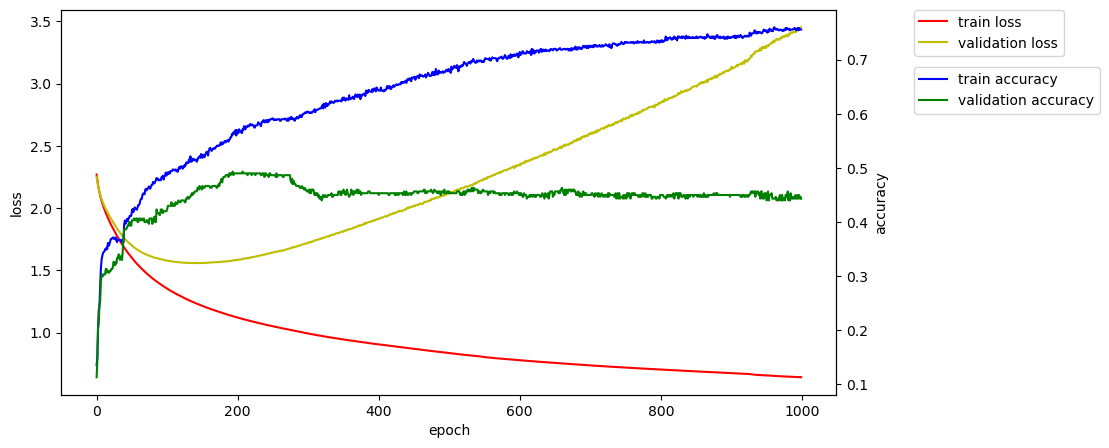

In [43]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

## ※콜백함수1

In [46]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 epoch 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'),
                                                                             logs.get('accuracy'),
                                                                             logs.get('val_loss'),
                                                                             logs.get('val_accuracy')))
# 1. 데이터 준비하기
(X_train, y_train),(X_test, y_test)  = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0 으로 나눠)
# 종속변수 전처리 : 원핫 인코딩
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
y_train = to_categorical(y_train).reshape(-1,10)
y_val = to_categorical(y_val).reshape(-1,10)
y_test = to_categorical(y_test).reshape(-1,10)
# 훈련셋 (5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_indexs = np.random.choice(50000,700)
val_indexs = np.random.choice(10000,300)
X_train = X_train[train_indexs]
y_train = y_train[train_indexs]
X_val = X_val[val_indexs]
y_val = y_val[val_indexs]
# 모델 구성하기
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 모델 학습하기
custom_history=CustomHistory()
hist = model.fit(X_train, y_train, batch_size=100, epochs=1200,
                 validation_data=(X_val, y_val),
                 verbose=0,
                 callbacks=[custom_history])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 1570      
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
epoch:50, loss:1.6220982074737549, acc:0.3514285683631897, val_loss1.6424660682678223, val_acc:0.3866666555404663
epoch:100, loss:1.3657366037368774, acc:0.4585714340209961, val_loss1.4857289791107178, val_acc:0.46000000834465027
epoch:150, loss:1.2058510780334473, acc:0.5799999833106995, val_loss1.4216166734695435, val_acc:0.5366666913032532
epoch:200, loss:1.0898654460906982, acc:0.6285714507102966, val_loss1.4002209901809692, val_acc:0.57666

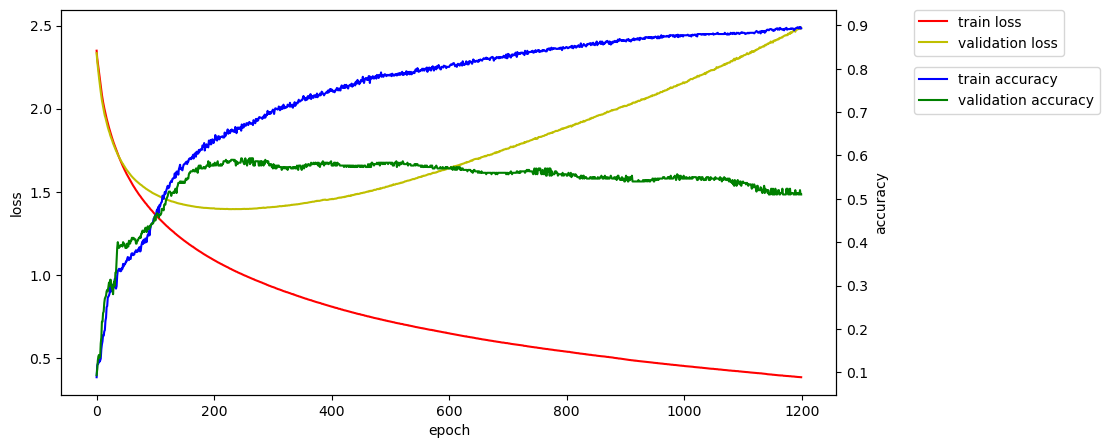

In [47]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

## ※콜백함수2 - Early Stopping(조기 종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [52]:


# 1. 데이터 준비하기
(X_train, y_train),(X_test, y_test)  = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0 으로 나눠)
# 종속변수 전처리 : 원핫 인코딩
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
y_train = to_categorical(y_train).reshape(-1,10)
y_val = to_categorical(y_val).reshape(-1,10)
y_test = to_categorical(y_test).reshape(-1,10)
# 훈련셋 (5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_indexs = np.random.choice(50000,700)
val_indexs = np.random.choice(10000,300)
X_train = X_train[train_indexs]
y_train = y_train[train_indexs]
X_val = X_val[val_indexs]
y_val = y_val[val_indexs]
# 모델 구성하기
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 모델 학습하기
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=4) # val_loss가 연달아 4번이상 성능이 좋아지지 않으면 stop
hist = model.fit(X_train, y_train, batch_size=100, epochs=1200,
                 validation_data=(X_val, y_val),
                 verbose=1,
                 callbacks=[early_stopping])

Epoch 1/1200
7/7 [==============================] - 1s 30ms/step - loss: 2.3100 - accuracy: 0.0671 - val_loss: 2.3067 - val_accuracy: 0.1033
Epoch 2/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.3003 - accuracy: 0.1114 - val_loss: 2.2991 - val_accuracy: 0.1100
Epoch 3/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.2903 - accuracy: 0.1186 - val_loss: 2.2863 - val_accuracy: 0.1333
Epoch 4/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2755 - accuracy: 0.1286 - val_loss: 2.2714 - val_accuracy: 0.1433
Epoch 5/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2619 - accuracy: 0.1443 - val_loss: 2.2549 - val_accuracy: 0.1767
Epoch 6/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2482 - accuracy: 0.1543 - val_loss: 2.2372 - val_accuracy: 0.1767
Epoch 7/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2314 - accuracy: 0.1600 - val_loss: 2.2070 - val_accuracy: 0.1200
Epoch 8/1200


Epoch 59/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5172 - accuracy: 0.4386 - val_loss: 1.5761 - val_accuracy: 0.3933
Epoch 60/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5120 - accuracy: 0.4243 - val_loss: 1.5738 - val_accuracy: 0.3900
Epoch 61/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5060 - accuracy: 0.4229 - val_loss: 1.5691 - val_accuracy: 0.3867
Epoch 62/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5017 - accuracy: 0.4243 - val_loss: 1.5663 - val_accuracy: 0.3933
Epoch 63/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.4966 - accuracy: 0.4257 - val_loss: 1.5638 - val_accuracy: 0.3967
Epoch 64/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.4916 - accuracy: 0.4271 - val_loss: 1.5600 - val_accuracy: 0.3967
Epoch 65/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.4868 - accuracy: 0.4257 - val_loss: 1.5538 - val_accuracy: 0.4067
Epoch 

Epoch 117/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3092 - accuracy: 0.4686 - val_loss: 1.4468 - val_accuracy: 0.4033
Epoch 118/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3055 - accuracy: 0.4700 - val_loss: 1.4476 - val_accuracy: 0.4033
Epoch 119/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.3026 - accuracy: 0.4714 - val_loss: 1.4471 - val_accuracy: 0.4033
Epoch 120/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3006 - accuracy: 0.4743 - val_loss: 1.4460 - val_accuracy: 0.3967
Epoch 121/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2978 - accuracy: 0.4771 - val_loss: 1.4458 - val_accuracy: 0.4000
Epoch 122/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2963 - accuracy: 0.4671 - val_loss: 1.4431 - val_accuracy: 0.4000
Epoch 123/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2933 - accuracy: 0.4786 - val_loss: 1.4420 - val_accuracy: 0.4067
Epoch

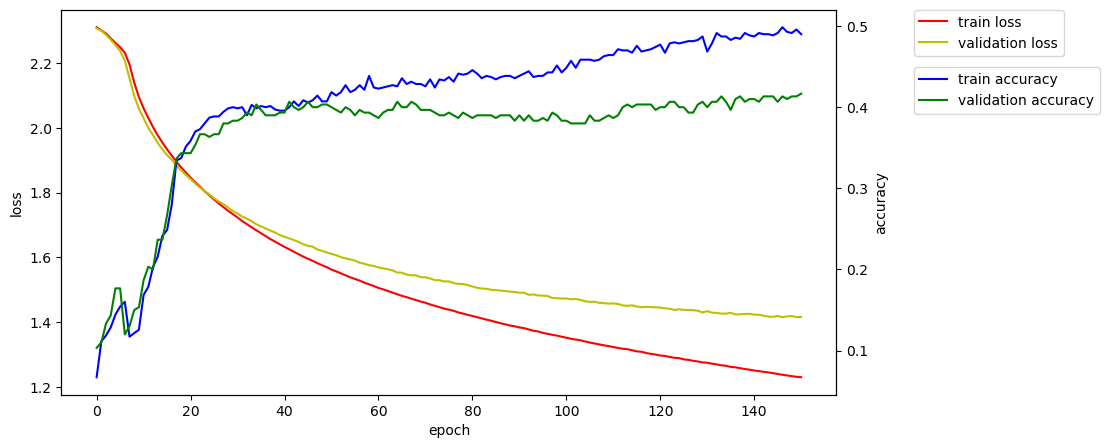

In [53]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어
- 활성화 함수 : 은닉층에는 주로 relu계열
- optimizer, epoch등을 조정